In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
%matplotlib inline
import matplotlib.pyplot as plt

sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
)

delivery = pd.read_csv('experiment_lesson_4.csv')

## Task 1 
- Нулевая гипотеза (H0): Разницы между средним временем доставки в тестовой и контрольной группе нет
- Альтернативная гипотеза (H1): Разница между средним временем доставки в тестовой и контрольной группе есть
- Нулевая гипотеза (H0): Изменение алгоритма не влияет на скорость доставки
- Альтернативная гипотеза (H1): Изменение алгоритма влияет на скорость доставки




## Task 2 

/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future v

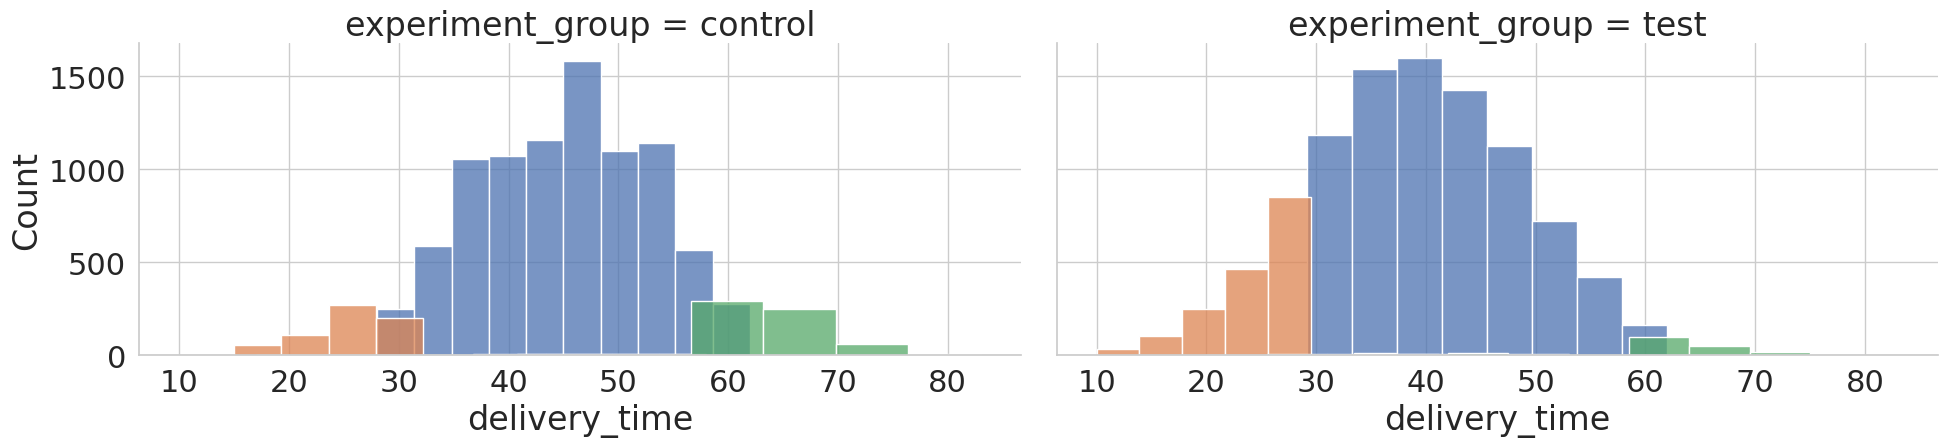

In [49]:
g = sns.FacetGrid(data=delivery, hue='district', col='experiment_group', height=5, aspect=2)
g.map(sns.histplot, 'delivery_time', bins=10)
plt.show()
# answer:
# a - control 
# b - tests

## Task 3

In [60]:
(
    delivery
    .groupby('experiment_group', as_index=False)
    .agg(obs = ('order_id', 'count'))
)
# answer - 12 

,experiment_group,obs
0,control,10092
1,test,10104


## Task 4

In [119]:
control = delivery.query("experiment_group == 'control'").delivery_time
test = delivery.query("experiment_group == 'test'").delivery_time
k2_control, p_control = sp.stats.normaltest(control)
k2_test, p_test = sp.stats.normaltest(test)
alpha = 0.05

In [94]:
if p_control < alpha:
    print("Control group IS NOT normally distribured")
else:
    print("Control group IS normally distribured")
    
if p_test < alpha:
    print("Test group IS NOT normally distribured")
else:
    print("Test group IS normally distribured")

Control group IS normally distribured
Test group IS NOT normally distribured


In [95]:
print('Control STD is: ' + str(round(np.std(control), 2)))
print('Test STD is: ' + str(round(np.std(test), 2)))

Control STD is: 9.99
Test STD is: 9.88


## Task 5

In [101]:
sp.stats.ttest_ind(test, control)

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

## Task 6 

In [122]:
(
    delivery
    .groupby('experiment_group', as_index=False)
    .agg(test = ('delivery_time', 'mean'))
)
#round( ((39.046813 - 45.065101)/45.065101), 2)
# answer - ( -13% )


,experiment_group,test
0,control,45.065101
1,test,39.046813


## Task 7

In [118]:
# answer - Да, раскатываем новый алгоритм на всех, так как среднее время доставки статистически значимо изменилось. Среднее время доставки в тесте меньше, чем в контроле.